In [83]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sci_plt
import yfinance as yf

from pprint import pprint
from sklearn.preprocessing import StandardScaler

In [111]:
#Define the tickers
tickers=['AAPL','MSFT','AMZN']
num_of_tickers=len(tickers) #For future use

#Load data
start_date='2018-01-01'
end_date='2024-01-01'

aapl_data=yf.download('AAPL',start=start_date,end=end_date)['Adj Close']
msft_data=yf.download('MSFT',start=start_date,end=end_date)['Adj Close']
amzn_data=yf.download('AMZN',start=start_date,end=end_date)['Adj Close']

combined_data=pd.DataFrame({'AAPL':aapl_data,
                            'MSFT':msft_data,
                            'AMZN':amzn_data})
combined_data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,AMZN
Date,,,
2018-01-02,40.615879,79.936737,59.450500
2018-01-03,40.608822,80.308746,60.209999
2018-01-04,40.797443,81.015572,60.479500
2018-01-05,41.261936,82.020027,61.457001
2018-01-08,41.108677,82.103737,62.343498
...,...,...,...
2023-12-22,193.091385,373.215393,153.419998
2023-12-26,192.542831,373.295135,153.410004
2023-12-27,192.642548,372.707275,153.339996


In [112]:
#Calculate log returns
log_return=np.log(1 + combined_data.pct_change()[1:])

#Generate random weights
random_weights=np.array(np.random.random(num_of_tickers))

#Normalize
norm_weights=random_weights/np.sum(random_weights)

#Find annualized expected returns
ret_exp=np.sum((log_return.mean() * norm_weights)*252)

#Expected annualized volatility
volatility_exp=np.sqrt(np.dot(norm_weights.T,np.dot(log_return.cov()*252,norm_weights)))

#Calculate Sharpe ratio
riskfree_rate=0.01
sharpe_ratio=(ret_exp-riskfree_rate)/volatility_exp

#Visualize
weights_df=pd.DataFrame({'random_weights': random_weights,
                        'normalized_weights': norm_weights})

print('')
print('='*80)
print('PORTFOLIO WEIGHTS: ')
print('-'*80)
print(weights_df)
print('-'*80)

metrics_df=pd.DataFrame({'Expected Portfolio Returns': ret_exp,
                        'Expected Portfolio Volatility': volatility_exp,
                        'Portfolio Sharpe Ratio': sharpe_ratio},index=[0])

print('')
print('='*80)
print('PORTFOLIO METRICS: ')
print('-'*80)
print(metrics_df)
print('-'*80)


PORTFOLIO WEIGHTS: 
--------------------------------------------------------------------------------
   random_weights  normalized_weights
0        0.498547            0.248833
1        0.525265            0.262168
2        0.979728            0.488998
--------------------------------------------------------------------------------

PORTFOLIO METRICS: 
--------------------------------------------------------------------------------
   Expected Portfolio Returns  Expected Portfolio Volatility  \
0                    0.208953                       0.296416   

   Portfolio Sharpe Ratio  
0                0.671196  
--------------------------------------------------------------------------------


In [113]:
#Define Monte Carlo simulation
num_of_simulations=4000

all_weights=np.zeros((num_of_simulations,num_of_tickers))
all_ret=np.zeros(num_of_simulations)
all_volatility=np.zeros(num_of_simulations)
all_sharpe=np.zeros(num_of_simulations)

#Start simulation
for i in range(num_of_simulations):
    weights=np.array(np.random.random(num_of_tickers))
    weights=weights/np.sum(weights)
    
    all_weights[i,:]=weights
    all_ret[i]=np.sum((log_return.mean()*weights)*252)
    all_volatility[i]= np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    all_sharpe[i]=(all_ret[i]-riskfree_rate)/all_volatility[i]
    
simulations_data=[all_ret,all_volatility,all_sharpe,all_weights]
simulations_df=pd.DataFrame(simulations_data).T
simulations_df.columns=['Returns','Volatility','Sharpe Ratio','Portfolio Weights']
simulations_df=simulations_df.infer_objects()

print('')
print('='*80)
print('SIMULATION RESULTS: ')
print('-'*80)
print(simulations_df.head(10))
print('-'*80)


SIMULATION RESULTS: 
--------------------------------------------------------------------------------
    Returns  Volatility  Sharpe Ratio  \
0  0.198412    0.304443      0.618875   
1  0.199859    0.303354      0.625866   
2  0.238097    0.286024      0.797475   
3  0.245624    0.287617      0.819227   
4  0.218205    0.291241      0.714887   
5  0.211414    0.298079      0.675708   
6  0.222664    0.289603      0.734328   
7  0.252033    0.288394      0.839246   
8  0.229217    0.286986      0.763858   
9  0.222594    0.289152      0.735232   

                                   Portfolio Weights  
0  [0.2134000582185676, 0.19409952359750482, 0.59...  
1  [0.17135251200082366, 0.25102359849285477, 0.5...  
2  [0.4148559104383465, 0.3813495000015166, 0.203...  
3  [0.5169797688260472, 0.3520316837058897, 0.130...  
4  [0.22818995346510038, 0.3743934781587411, 0.39...  
5  [0.44963748495393874, 0.08278580853185884, 0.4...  
6  [0.3617295522236393, 0.2829509416535318, 0.355...  
7  [0

In [114]:
#Find desireable weights
max_sharpe_ratio=simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]
min_volatility=simulations_df.loc[simulations_df['Volatility'].idxmin()]

print('')
print('='*80)
print('MAX SHARPE: ')
print('-'*80)
print(max_sharpe_ratio)
print('-'*80)

print('')
print('='*80)
print('MIN VOLATILITY: ')
print('-'*80)
print(min_volatility)
print('-'*80)


MAX SHARPE: 
--------------------------------------------------------------------------------
Returns                                                       0.258685
Volatility                                                    0.288464
Sharpe Ratio                                                  0.862101
Portfolio Weights    [0.4156304004388451, 0.5837020196418814, 0.000...
Name: 1725, dtype: object
--------------------------------------------------------------------------------

MIN VOLATILITY: 
--------------------------------------------------------------------------------
Returns                                                       0.242215
Volatility                                                     0.28537
Sharpe Ratio                                                  0.813734
Portfolio Weights    [0.349193159801141, 0.4885797148628183, 0.1622...
Name: 2112, dtype: object
--------------------------------------------------------------------------------


/tmp/ipykernel_772/3034753157.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_ratio[1],
/tmp/ipykernel_772/3034753157.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_ratio[0],
/tmp/ipykernel_772/3034753157.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_volatility[1],
/tmp/ipykernel_772/3034753157.py:18: FutureWarning: Series.__getitem__ treating keys as positions is d

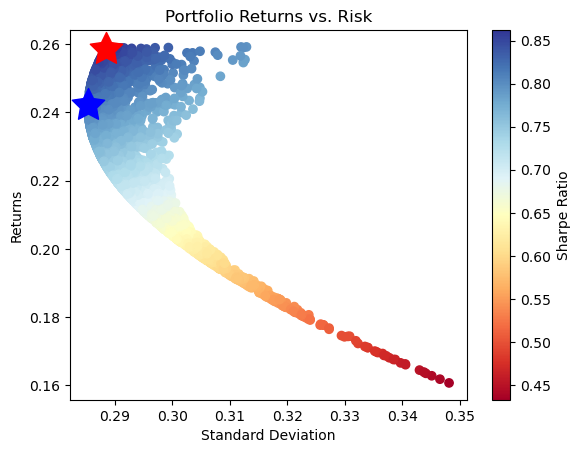

In [121]:
%matplotlib inline

#Plot data
plt.scatter(y=simulations_df['Returns'],
            x=simulations_df['Volatility'],
            c=simulations_df['Sharpe Ratio'],
            cmap='RdYlBu')
plt.title('Portfolio Returns vs. Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.scatter(max_sharpe_ratio[1],
            max_sharpe_ratio[0],
            marker=(5,1,0),
            color='r',
            s=600)
plt.scatter(min_volatility[1],
            min_volatility[0],
            marker=(5,1,0),
            color='b',
            s=600)

In [131]:
#Optimize

def get_metrics(weights: list) -> np.array:
    weights=np.array(weights)
    ret=np.sum(log_return.mean()*weights)*252
    vol=np.dot(weights.T,np.dot(log_return.cov()*252,weights))
    sr=(ret-riskfree_rate)/vol
    return np.array([ret,vol,sr])

def get_negative_Sharpe(weights: list) -> np.array:
    return get_metrics(weights)[2]-1 #Subtract 1 to change from maximization problem to minimization problem

def get_vol(weights: list) -> np.array:
    return get_metrics(weights)[1]

def check_sum(weights: list) -> float:
    return np.sum(weights)-1

#Define bounds in our optimization problem (make sure no asset is more than 100% of whole portfolio)
bounds=tuple((0,1) for ticker in range(num_of_tickers))

#Define constraints (make sure weights do not exceed 100%)
constraint=({'type': 'eq','fun': check_sum})

#Define initial guesses
init_guess = num_of_tickers*[1/num_of_tickers]

#Optimize
optimized_sharpe=sci_plt.minimize(get_negative_Sharpe, #what to minimize
                                  init_guess, #initial weights
                                  method='SLSQP',
                                  bounds=bounds,
                                  constraints=constraint)
print('')
print('='*80)
print('OPTIMIZED SHARPE: ')
print('-'*80)
print(optimized_sharpe)
print('-'*80)


OPTIMIZED SHARPE: 
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.17355405149418868
       x: [ 0.000e+00  0.000e+00  1.000e+00]
     nit: 2
     jac: [ 7.602e-01  6.683e-01 -1.094e+00]
    nfev: 8
    njev: 2
--------------------------------------------------------------------------------


In [132]:
#Get final results
optimized_metrics=get_metrics(weights=optimized_sharpe.x)

print('')
print('='*80)
print('OPTIMIZED WEIGHTS: ')
print('-'*80)
print(optimized_sharpe.x)
print('-'*80)

print('')
print('='*80)
print('OPTIMIZED METRICS: ')
print('-'*80)
print(optimized_sharpe)
print('-'*80)


OPTIMIZED WEIGHTS: 
--------------------------------------------------------------------------------
[0. 0. 1.]
--------------------------------------------------------------------------------

OPTIMIZED METRICS: 
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.17355405149418868
       x: [ 0.000e+00  0.000e+00  1.000e+00]
     nit: 2
     jac: [ 7.602e-01  6.683e-01 -1.094e+00]
    nfev: 8
    njev: 2
--------------------------------------------------------------------------------
